# Dataset Covertype

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Cargar el dataset Covertype
data = fetch_covtype()
X = data.data
y = data.target

# Crear un DataFrame de pandas para facilitar el análisis
feature_names = data.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['Cover_Type'] = y

# Mostrar información general del dataset
print("Información del DataFrame:")
print(df.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11 

In [2]:
print("\nEstadísticas descriptivas:")
print(df.describe())

# Tipos de variables
print("\nTipos de variables:")
print(df.dtypes)


Estadísticas descriptivas:
           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.00

In [3]:
# Identificar variables categóricas y numéricas
categorical_features = [col for col in df.columns if 'Soil_Type' in col or 'Wilderness_Area' in col]
numerical_features = [col for col in df.columns if col not in categorical_features + ['Cover_Type']]

print("\nVariables numéricas:")
print(numerical_features)

print("\nVariables categóricas:")
print(categorical_features)


Variables numéricas:
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

Variables categóricas:
['Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']


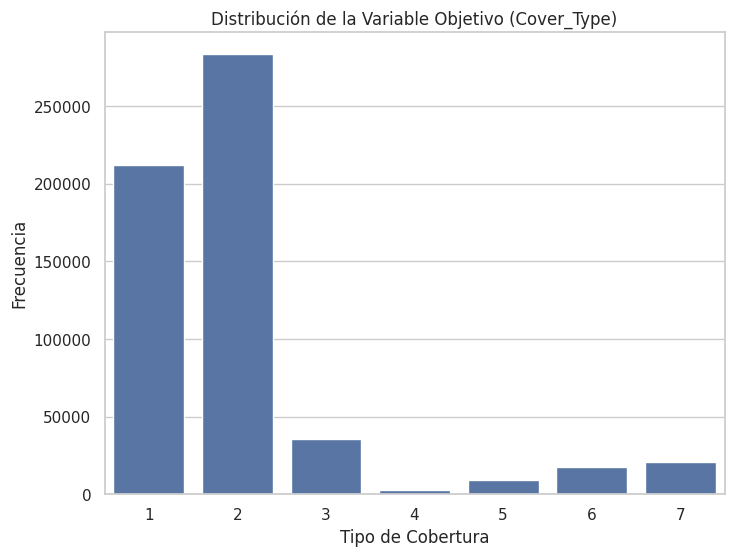

In [4]:
# Distribución de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=df)
plt.title('Distribución de la Variable Objetivo (Cover_Type)')
plt.xlabel('Tipo de Cobertura')
plt.ylabel('Frecuencia')
plt.show()

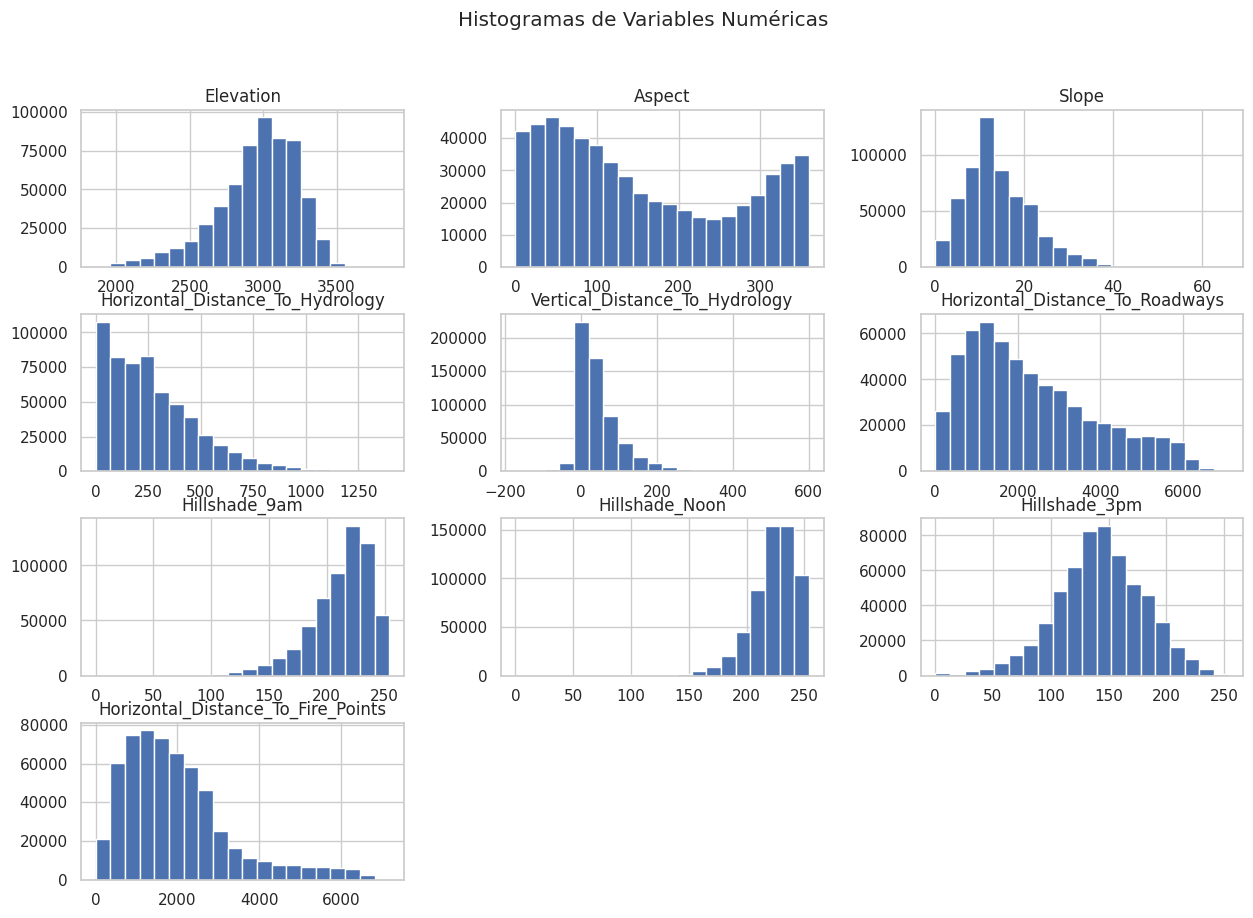

In [5]:
# Histogramas de variables numéricas
df[numerical_features].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

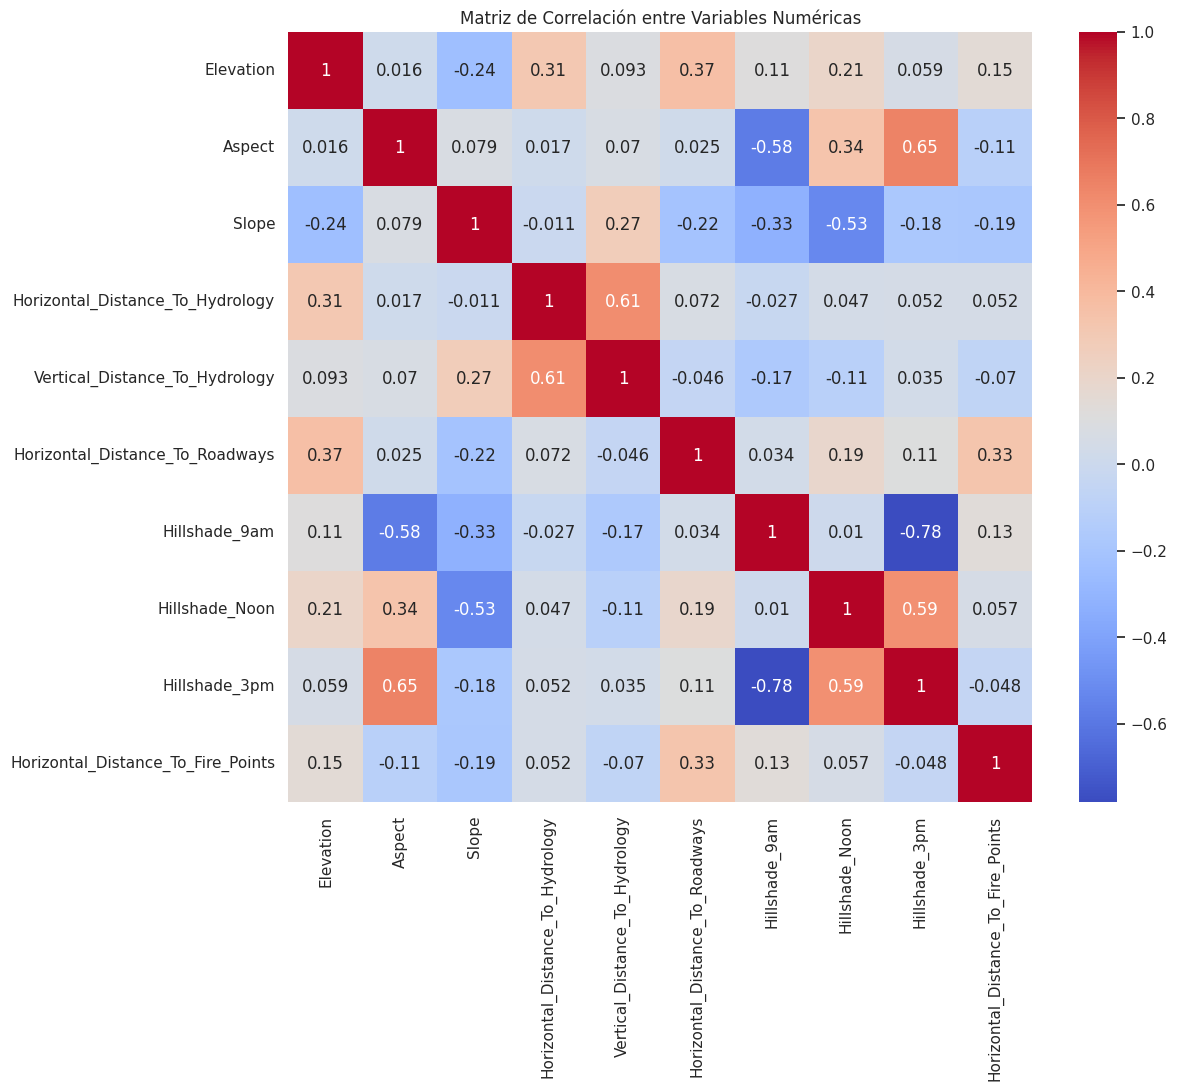

In [6]:
# Correlación entre variables numéricas
plt.figure(figsize=(12, 10))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

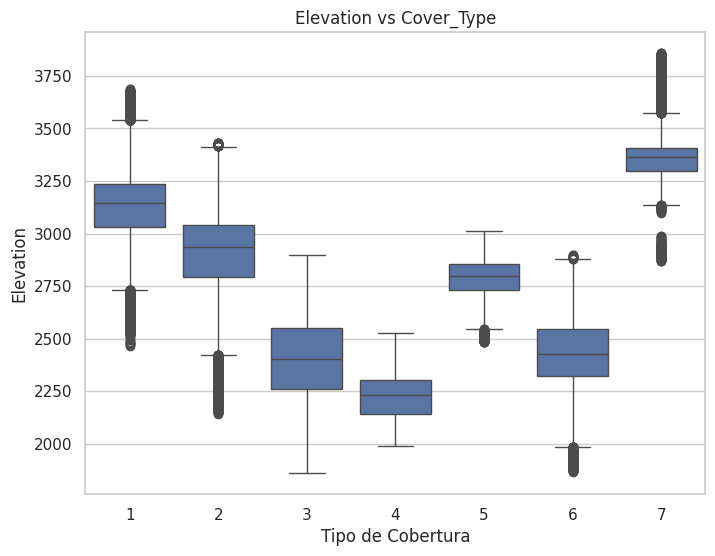

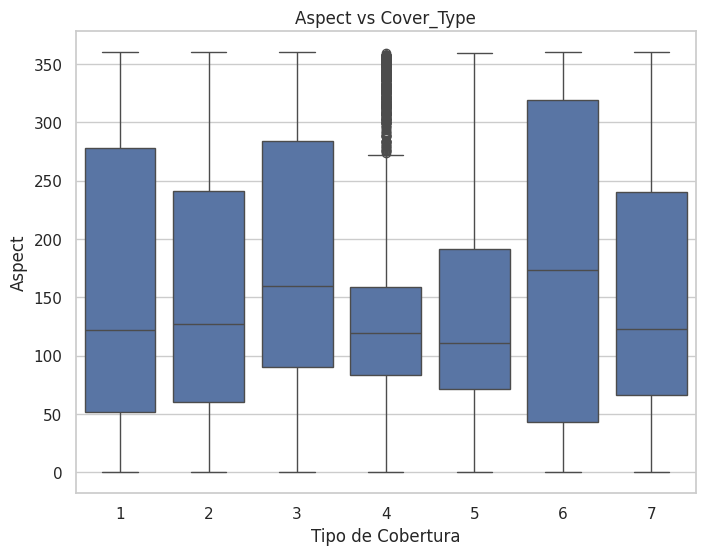

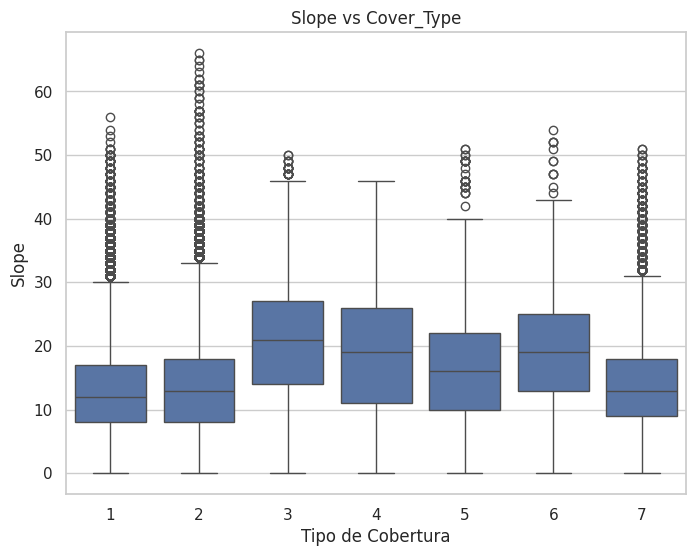

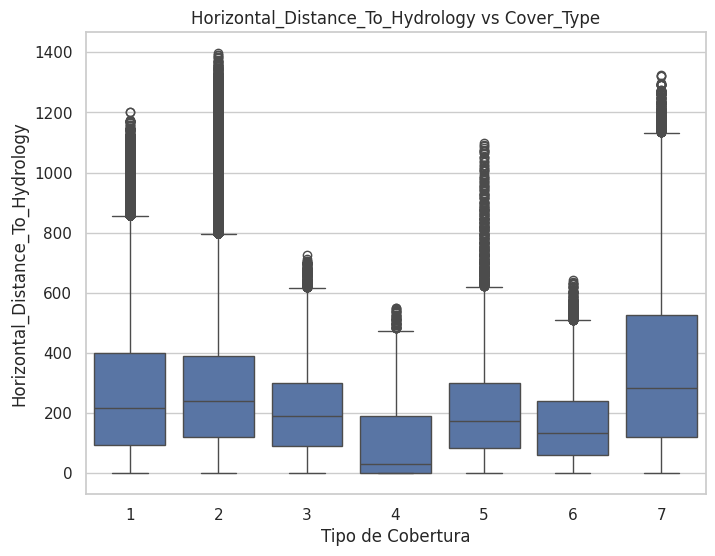

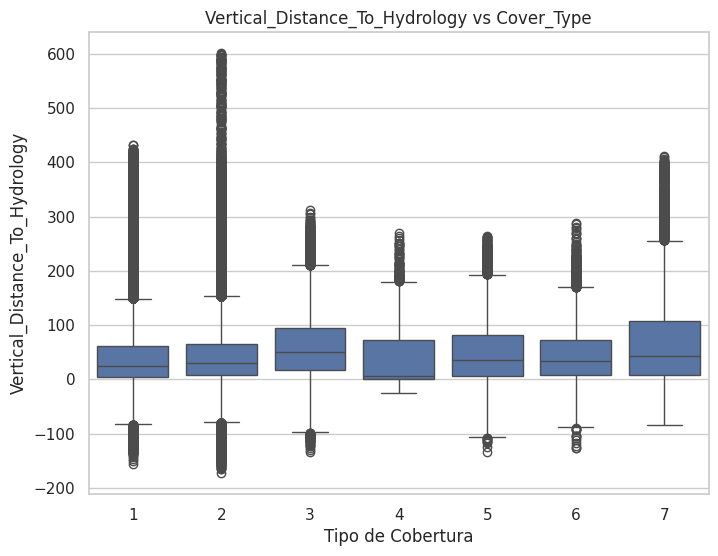

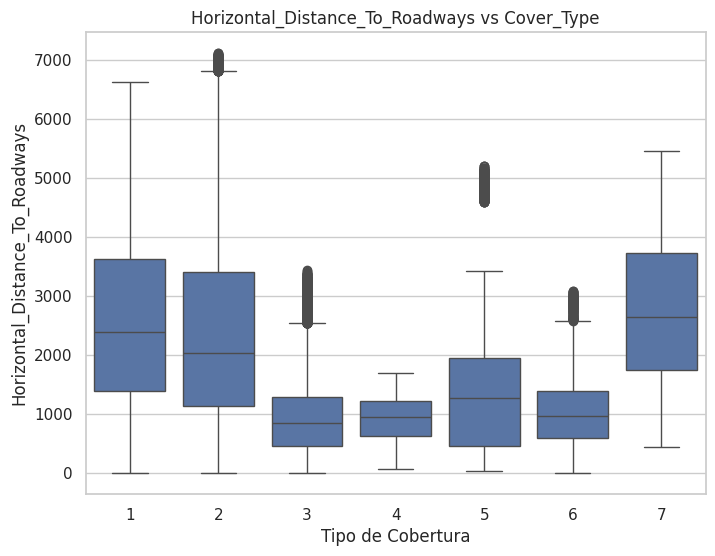

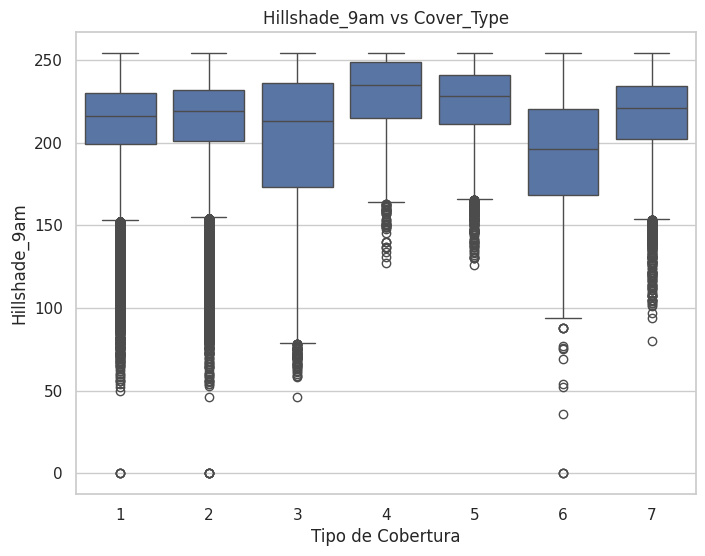

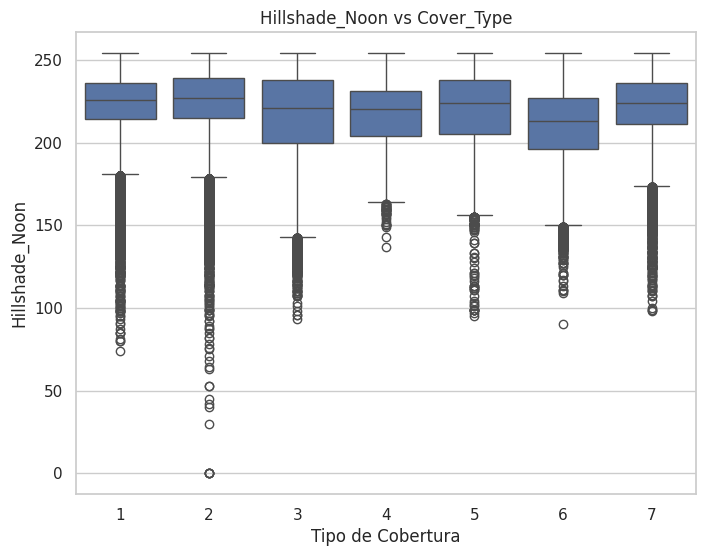

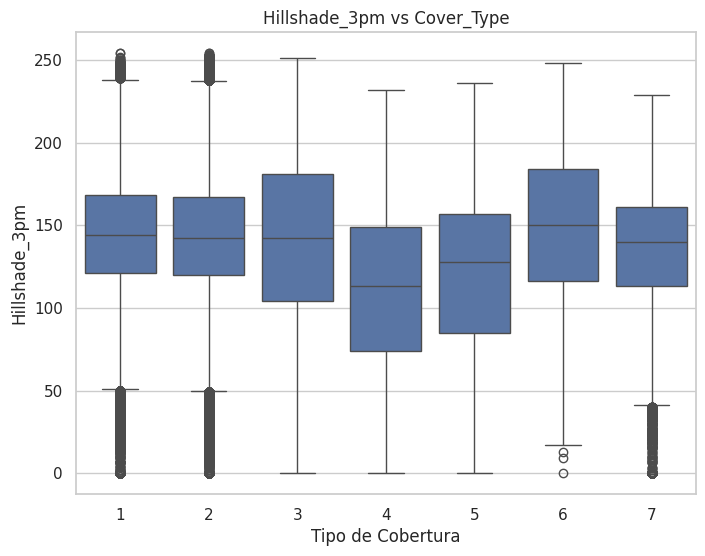

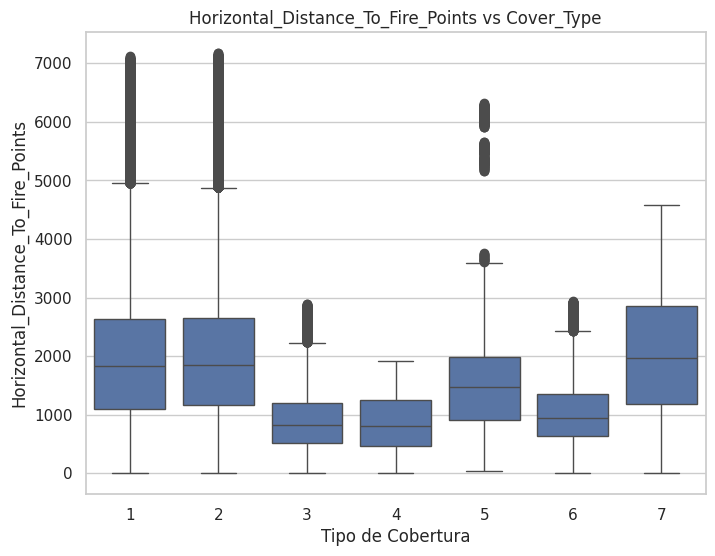

In [7]:
# Relación entre variables numéricas y la variable objetivo
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cover_Type', y=col, data=df)
    plt.title(f'{col} vs Cover_Type')
    plt.xlabel('Tipo de Cobertura')
    plt.ylabel(col)
    plt.show()

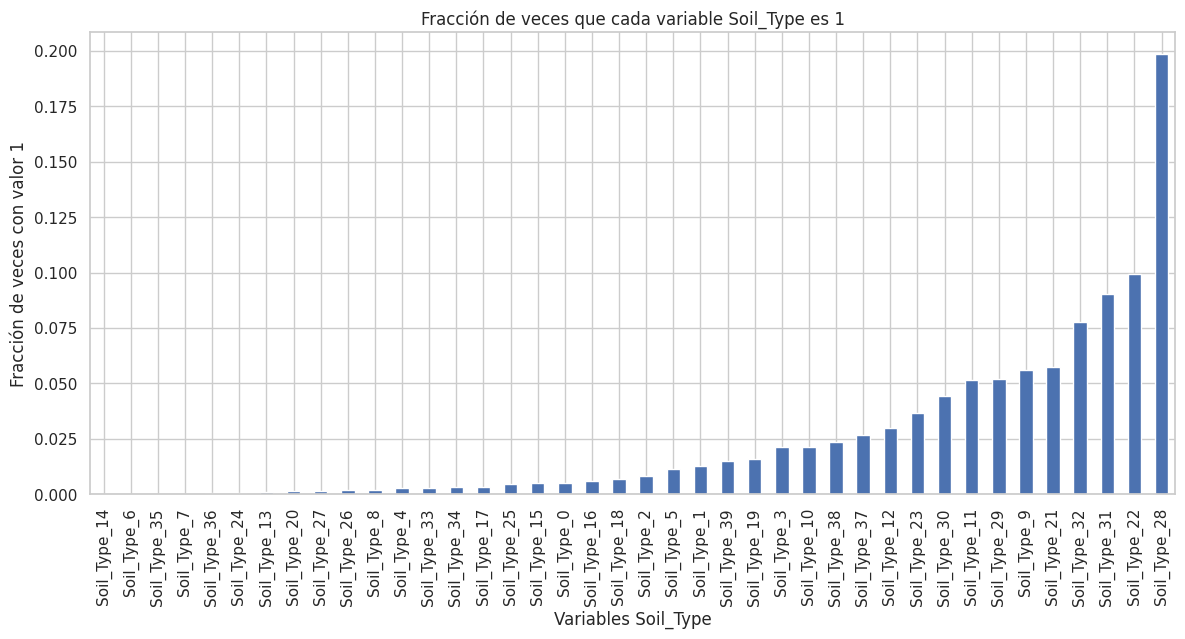

In [8]:
# Dividir variables categóricas en Soil_Type y Wilderness_Area
cover_types = sorted(df['Cover_Type'].unique())
soil_type_features = [col for col in df.columns if 'Soil_Type' in col]
wilderness_area_features = [col for col in df.columns if 'Wilderness_Area' in col]

# Histograma de variables Soil_Type que muestra la fracción de veces que el valor es 1
soil_type_means = df[soil_type_features].mean()

plt.figure(figsize=(14, 6))
soil_type_means.sort_values().plot(kind='bar')
plt.title('Fracción de veces que cada variable Soil_Type es 1')
plt.xlabel('Variables Soil_Type')
plt.ylabel('Fracción de veces con valor 1')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_9900/4228560137.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  soil_cover_proportions = soil_cover_proportions.fillna(0)


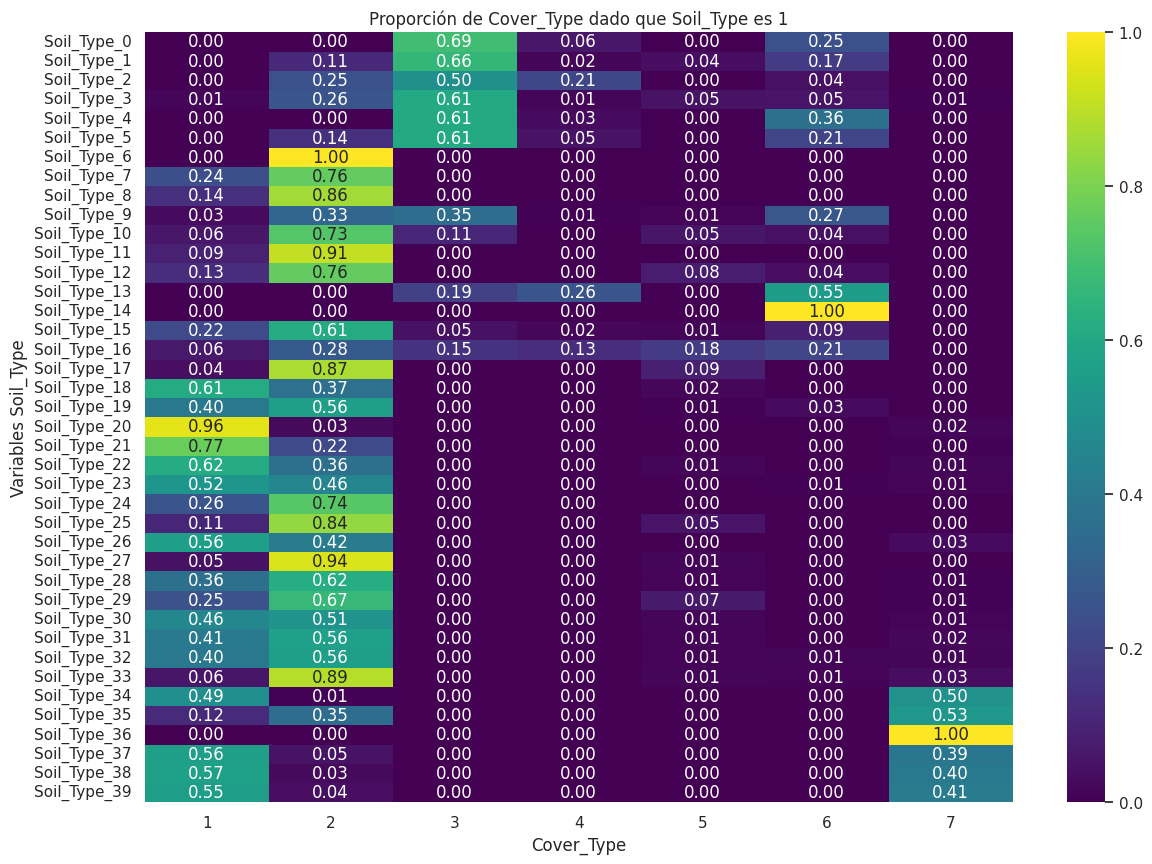

In [9]:
# Relación entre variables Soil_Type y la variable objetivo
# Crear una tabla que contenga, para cada variable Soil_Type, la proporción de cada Cover_Type cuando la variable es 1
soil_cover_proportions = pd.DataFrame(index=soil_type_features, columns=cover_types)

for cat in soil_type_features:
    total_cat = df[df[cat] == 1].shape[0]
    if total_cat > 0:
        proportions = df[df[cat] == 1]['Cover_Type'].value_counts(normalize=True)
        for ct in cover_types:
            if ct in proportions.index:
                soil_cover_proportions.at[cat, ct] = proportions[ct]
            else:
                soil_cover_proportions.at[cat, ct] = 0
    else:
        soil_cover_proportions.loc[cat] = 0

soil_cover_proportions = soil_cover_proportions.fillna(0)
soil_cover_proportions = soil_cover_proportions.astype(float)

# Crear un heatmap para Soil_Type
plt.figure(figsize=(14, 10))
sns.heatmap(soil_cover_proportions, annot=True, cmap='viridis', fmt=".2f")
plt.title('Proporción de Cover_Type dado que Soil_Type es 1')
plt.xlabel('Cover_Type')
plt.ylabel('Variables Soil_Type')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

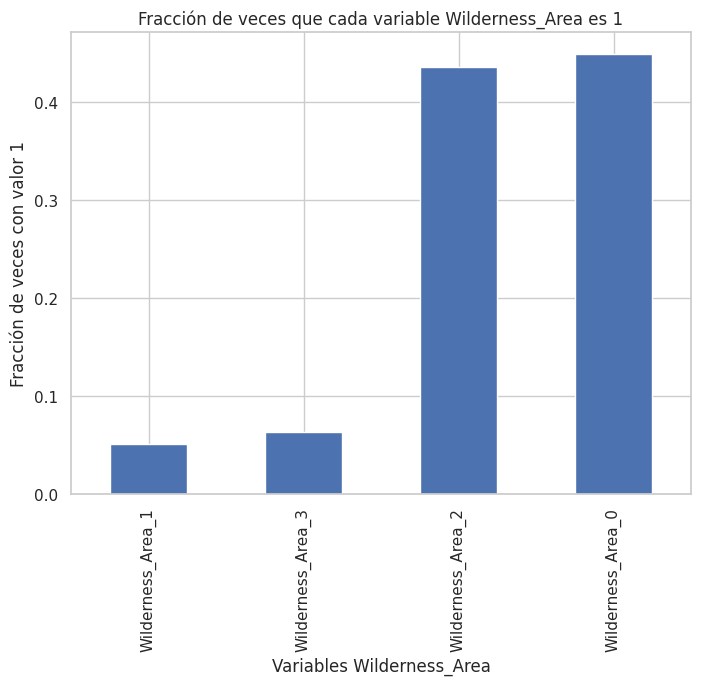

In [10]:
# Histograma de variables Wilderness_Area que muestra la fracción de veces que el valor es 1
wilderness_area_means = df[wilderness_area_features].mean()

plt.figure(figsize=(8, 6))
wilderness_area_means.sort_values().plot(kind='bar')
plt.title('Fracción de veces que cada variable Wilderness_Area es 1')
plt.xlabel('Variables Wilderness_Area')
plt.ylabel('Fracción de veces con valor 1')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_9900/3385931593.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wilderness_cover_proportions = wilderness_cover_proportions.fillna(0)


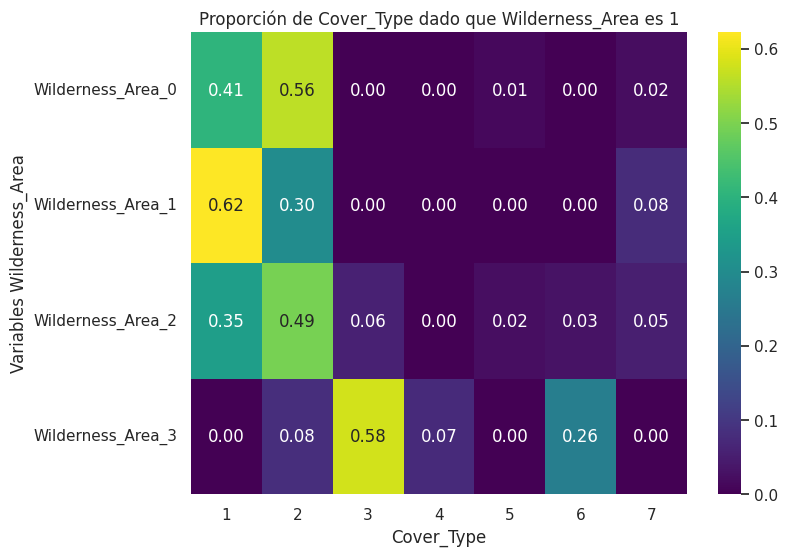

In [11]:
# Relación entre variables Wilderness_Area y la variable objetivo
# Crear una tabla que contenga, para cada variable Wilderness_Area, la proporción de cada Cover_Type cuando la variable es 1
cover_types = sorted(df['Cover_Type'].unique())
wilderness_cover_proportions = pd.DataFrame(index=wilderness_area_features, columns=cover_types)

for cat in wilderness_area_features:
    total_cat = df[df[cat] == 1].shape[0]
    if total_cat > 0:
        proportions = df[df[cat] == 1]['Cover_Type'].value_counts(normalize=True)
        for ct in cover_types:
            if ct in proportions.index:
                wilderness_cover_proportions.at[cat, ct] = proportions[ct]
            else:
                wilderness_cover_proportions.at[cat, ct] = 0
    else:
        wilderness_cover_proportions.loc[cat] = 0

wilderness_cover_proportions = wilderness_cover_proportions.fillna(0)
wilderness_cover_proportions = wilderness_cover_proportions.astype(float)

# Crear un heatmap para Wilderness_Area
plt.figure(figsize=(8, 6))
sns.heatmap(wilderness_cover_proportions, annot=True, cmap='viridis', fmt=".2f")
plt.title('Proporción de Cover_Type dado que Wilderness_Area es 1')
plt.xlabel('Cover_Type')
plt.ylabel('Variables Wilderness_Area')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

/tmp/ipykernel_9900/4111325258.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  category_cover_proportions = category_cover_proportions.fillna(0)


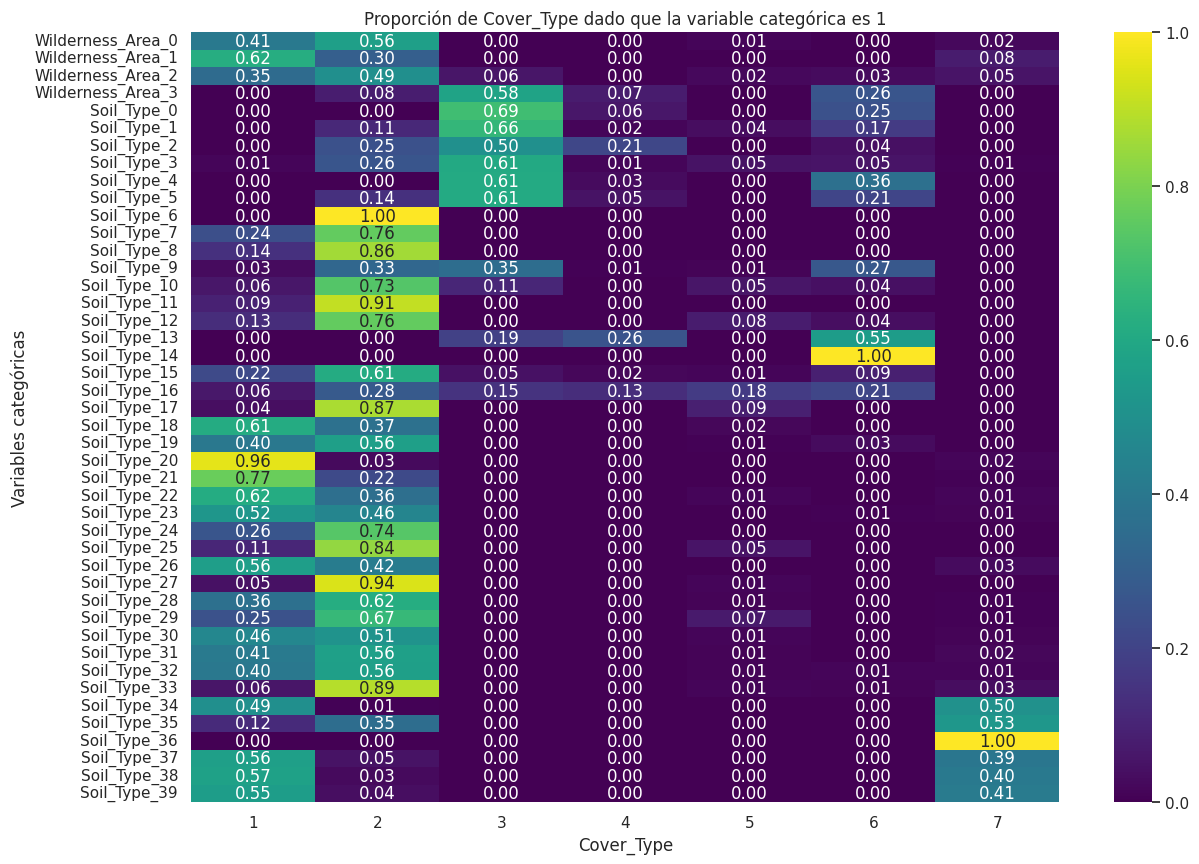

In [12]:
# Relación entre variables categóricas y la variable objetivo en un único plot
# Crear una tabla que contenga, para cada variable categórica, la proporción de cada Cover_Type cuando la variable es 1
cover_types = sorted(df['Cover_Type'].unique())
category_cover_proportions = pd.DataFrame(index=categorical_features, columns=cover_types)

for cat in categorical_features:
    total_cat = df[df[cat] == 1].shape[0]
    if total_cat > 0:
        proportions = df[df[cat] == 1]['Cover_Type'].value_counts(normalize=True)
        for ct in cover_types:
            if ct in proportions.index:
                category_cover_proportions.at[cat, ct] = proportions[ct]
            else:
                category_cover_proportions.at[cat, ct] = 0
    else:
        category_cover_proportions.loc[cat] = 0

category_cover_proportions = category_cover_proportions.fillna(0)

# Convertir a tipo float para asegurar compatibilidad con seaborn
category_cover_proportions = category_cover_proportions.astype(float)

# Crear un heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(category_cover_proportions, annot=True, cmap='viridis', fmt=".2f")
plt.title('Proporción de Cover_Type dado que la variable categórica es 1')
plt.xlabel('Cover_Type')
plt.ylabel('Variables categóricas')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

# Vamos a entrenar redes neuronales usando pytorch

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset Covertype
data = fetch_covtype()
df = pd.DataFrame(data.data, columns=data.feature_names)

categorical_features = [col for col in df.columns if 'Soil_Type' in col or 'Wilderness_Area' in col]
numerical_features = [col for col in df.columns if col not in categorical_features + ['Cover_Type']]

target = data.target - 1  # Ajustar etiquetas para que comiencen desde 0
X = df[numerical_features].values
y = target

# Convertir datos a float32 para PyTorch
X = X.astype(np.float32)
y = y.astype(np.long)

# Dividir el dataset: 20% para entrenamiento, 80% para pruebas
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.95, random_state=42)

# Dividir el conjunto de prueba en 100 subconjuntos
test_datasets = []
X_test_splits = np.array_split(X_temp, 100)
y_test_splits = np.array_split(y_temp, 100)

for X_test_part, y_test_part in zip(X_test_splits, y_test_splits):
    test_datasets.append((X_test_part, y_test_part))

In [22]:
# Definir el modelo de red neuronal
class Net(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_sizes[1], output_size)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

In [23]:
input_size = X_train.shape[1]
output_size = np.unique(y_train).shape[0]  # Número de clases
print(f"Tenemos {output_size} clases")

Tenemos 7 clases


In [26]:
# Listas para almacenar métricas
model_complexities = []
train_errors = []
mean_test_errors = []
variance_test_errors = []

# Lista de tamaños de capas ocultas para aumentar la complejidad
hidden_sizes_list = [[n, m] for n in [32, 16, 8] for m in [32, 16, 8]]

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

Device: cuda


In [27]:
for hidden_sizes in hidden_sizes_list:
    print(f"Entrenando modelo con capas ocultas: {hidden_sizes}")
    model = Net(input_size, hidden_sizes, output_size)
    # to device
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.005)

    # Convertir datos de entrenamiento a tensores
    X_train_tensor = torch.from_numpy(X_train)
    y_train_tensor = torch.from_numpy(y_train)
    X_train_tensor = X_train_tensor.to(device)
    y_train_tensor = y_train_tensor.to(device)

    # Entrenamiento del modelo
    epochs = 10
    batch_size = 64
    for epoch in range(epochs):
        permutation = torch.randperm(X_train_tensor.size()[0])
        for i in range(0, X_train_tensor.size()[0], batch_size):
            indices = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    # Evaluación en el conjunto de entrenamiento
    with torch.no_grad():
        outputs = model(X_train_tensor)
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.cpu()
        train_accuracy = accuracy_score(y_train, predicted.numpy())
        train_error = 1 - train_accuracy

    # Evaluación en los conjuntos de prueba
    test_errors = []
    for X_test_part, y_test_part in test_datasets:
        X_test_tensor = torch.from_numpy(X_test_part).to(device)
        y_test_tensor = torch.from_numpy(y_test_part).to(device)
        with torch.no_grad():
            outputs = model(X_test_tensor)
            _, predicted = torch.max(outputs.data, 1)
            predicted = predicted.cpu()
            test_accuracy = accuracy_score(y_test_part, predicted.numpy())
            test_error = 1 - test_accuracy
            test_errors.append(test_error)

    mean_test_error = np.mean(test_errors)
    variance_test_error = np.var(test_errors)

    # Almacenar métricas
    model_complexity = sum(hidden_sizes)
    model_complexities.append(model_complexity)
    train_errors.append(train_error)
    mean_test_errors.append(mean_test_error)
    variance_test_errors.append(variance_test_error)

    print(f"Complejidad del modelo: {model_complexity}, Error en entrenamiento: {train_error:.4f}, Error medio en prueba: {mean_test_error:.4f}, Varianza del error en prueba: {variance_test_error:.6f}")

Entrenando modelo con capas ocultas: [32, 32]
Complejidad del modelo: 64, Error en entrenamiento: 0.3257, Error medio en prueba: 0.3274, Varianza del error en prueba: 0.000038
Entrenando modelo con capas ocultas: [32, 16]
Complejidad del modelo: 48, Error en entrenamiento: 0.3269, Error medio en prueba: 0.3264, Varianza del error en prueba: 0.000040
Entrenando modelo con capas ocultas: [32, 8]
Complejidad del modelo: 40, Error en entrenamiento: 0.5145, Error medio en prueba: 0.5123, Varianza del error en prueba: 0.000041
Entrenando modelo con capas ocultas: [16, 32]
Complejidad del modelo: 48, Error en entrenamiento: 0.3175, Error medio en prueba: 0.3201, Varianza del error en prueba: 0.000037
Entrenando modelo con capas ocultas: [16, 16]
Complejidad del modelo: 32, Error en entrenamiento: 0.3451, Error medio en prueba: 0.3453, Varianza del error en prueba: 0.000040
Entrenando modelo con capas ocultas: [16, 8]
Complejidad del modelo: 24, Error en entrenamiento: 0.3386, Error medio en p

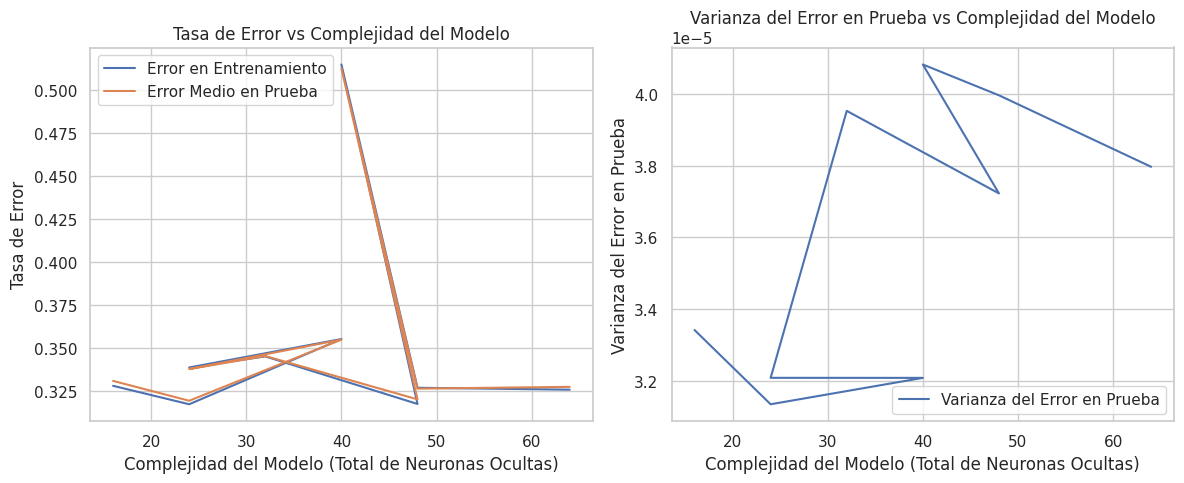

In [28]:
# Generar gráficos de las métricas para cada modelo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model_complexities, train_errors, label='Error en Entrenamiento')
plt.plot(model_complexities, mean_test_errors, label='Error Medio en Prueba')
plt.xlabel('Complejidad del Modelo (Total de Neuronas Ocultas)')
plt.ylabel('Tasa de Error')
plt.title('Tasa de Error vs Complejidad del Modelo')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_complexities, variance_test_errors, label='Varianza del Error en Prueba')
plt.xlabel('Complejidad del Modelo (Total de Neuronas Ocultas)')
plt.ylabel('Varianza del Error en Prueba')
plt.title('Varianza del Error en Prueba vs Complejidad del Modelo')
plt.legend()

plt.tight_layout()
plt.show()